### Connection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='M@hmudul162',
    database='telco_churn'
)


In [2]:
df = pd.read_sql('SELECT * FROM telco_customer_churn', conn)  
print(df.head())

   CustomerID  Count        Country       State         City  Zip_Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat_Long  Latitude  Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783   33.9641   -118.273    Male  ...  Month-to-month   
1   34.059281, -118.30742   34.0593   -118.307  Female  ...  Month-to-month   
2  34.048013, -118.293953   34.0480   -118.294  Female  ...  Month-to-month   
3  34.062125, -118.315709   34.0621   -118.316  Female  ...  Month-to-month   
4  34.039224, -118.266293   34.0392   -118.266    Male  ...  Month-to-month   

  Paperless_Billing             Payment_Method  Monthly_Charge Total_Charges  \


C:\Users\mahmu\AppData\Local\Temp\ipykernel_5928\3474665642.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM telco_customer_churn', conn)


In [3]:
print(df.isnull().sum())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip_Code             0
Lat_Long             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charge       0
Total_Charges        0
Churn_Label          0
Churn_Value          0
Churn_Score          0
CLTV                 0
Churn_Reason         0
dtype: int64


In [4]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

## Feature Engineering and EDA

In [5]:
# Convert 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', etc., to numeric values
df['Senior_Citizen'] = df['Senior_Citizen'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Phone_Service'] = df['Phone_Service'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Multiple_Lines'] = df['Multiple_Lines'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert other categorical columns like 'Internet_Service', 'Contract', 'Payment_Method', etc., using one-hot encoding
df = pd.get_dummies(df, columns=['Internet_Service', 'Contract', 'Payment_Method'])

In [6]:
# Summary of the data
print(df.describe())

# Check data types again
print(df.dtypes)


        Count      Zip_Code     Latitude    Longitude       Gender  \
count  7043.0   7043.000000  7043.000000  7043.000000  7043.000000   
mean      1.0  93521.964646    36.282440  -119.798886     0.504756   
std       0.0   1865.794555     2.455723     2.157885     0.500013   
min       1.0  90001.000000    32.555800  -124.301000     0.000000   
25%       1.0  92102.000000    34.030900  -121.815000     0.000000   
50%       1.0  93552.000000    36.391800  -119.731000     1.000000   
75%       1.0  95351.000000    38.224900  -118.043000     1.000000   
max       1.0  96161.000000    41.962100  -114.193000     1.000000   

       Senior_Citizen      Partner   Dependents  Tenure_Months  Phone_Service  \
count     7043.000000  7043.000000  7043.000000    7043.000000    7043.000000   
mean         0.162147     0.483033     0.231010      32.371149       0.903166   
std          0.368612     0.499748     0.421508      24.559481       0.295752   
min          0.000000     0.000000     0.0000

In [7]:
df = pd.get_dummies(df, columns=['Country', 'State', 'City'], drop_first=True)

In [8]:
# Check if Lat_Long can be split
df[['Latitude', 'Longitude']] = df['Lat_Long'].str.split(',', expand=True)

# Convert to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Drop Lat_Long column
df = df.drop(columns=['Lat_Long'])


In [9]:
# Map Yes/No columns to 1/0
yes_no_columns = ['Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 
                  'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing']

for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [10]:
# Encode the Churn_Label column
df['Churn_Label'] = df['Churn_Label'].map({'Yes': 1, 'No': 0})


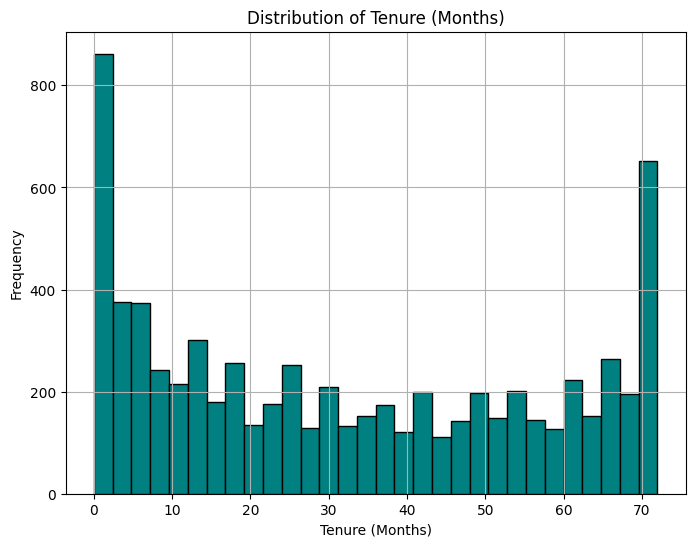

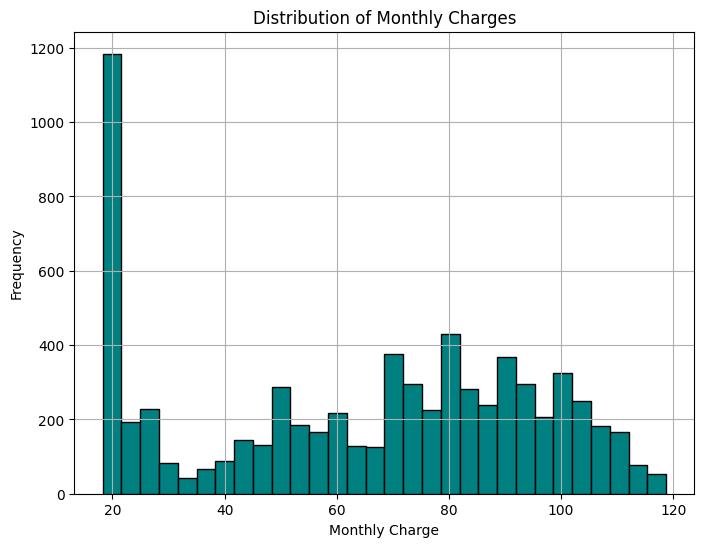

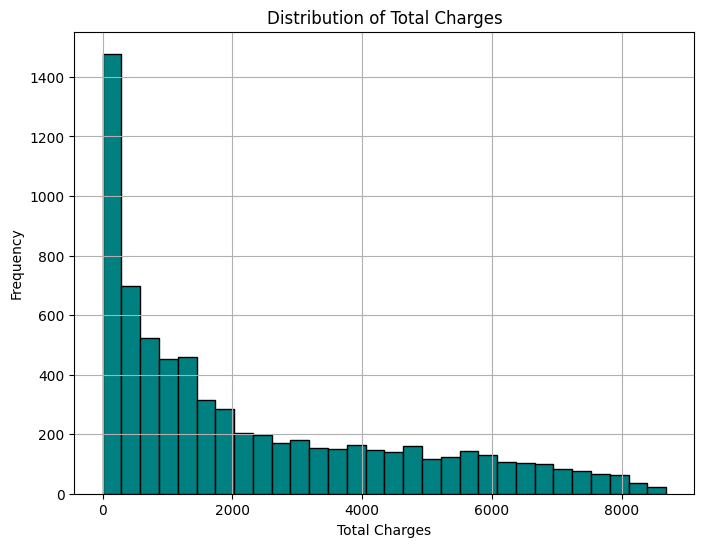

In [11]:
import matplotlib.pyplot as plt

# Histogram for 'Tenure_Months'
plt.figure(figsize=(8, 6))
df['Tenure_Months'].hist(bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'Monthly_Charge'
plt.figure(figsize=(8, 6))
df['Monthly_Charge'].hist(bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'Total_Charges'
plt.figure(figsize=(8, 6))
df['Total_Charges'].hist(bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


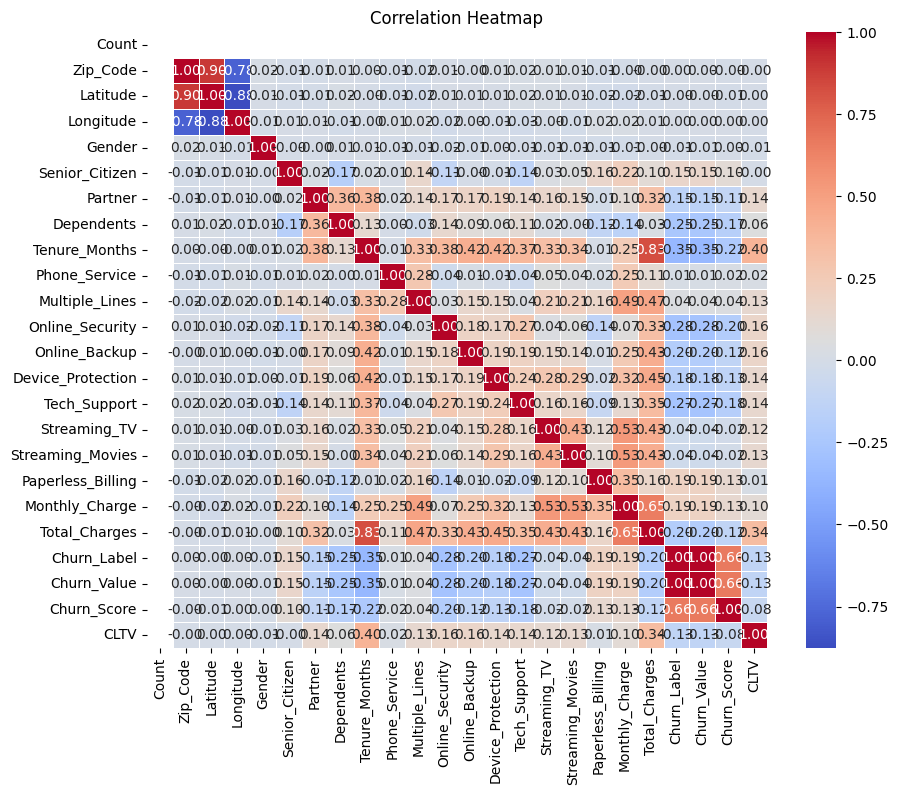

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



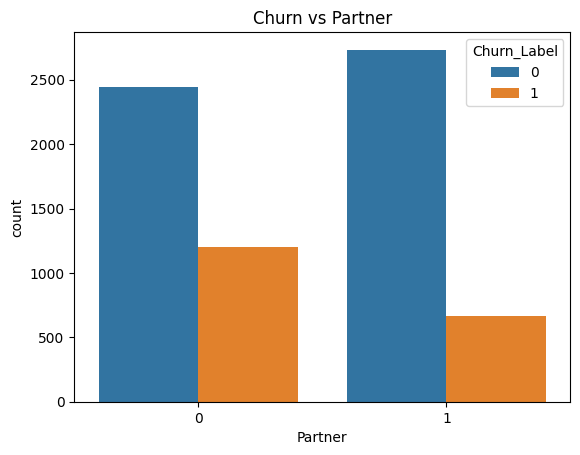

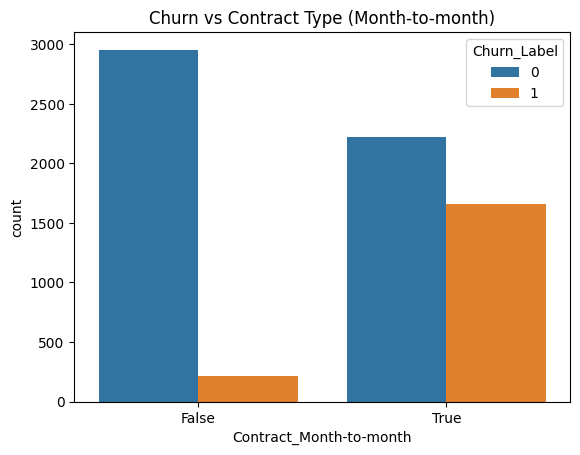

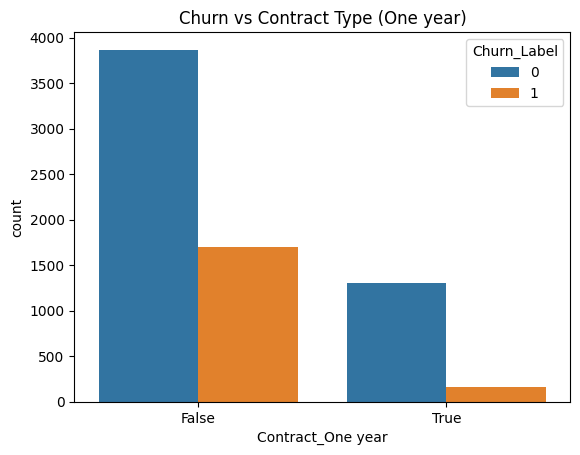

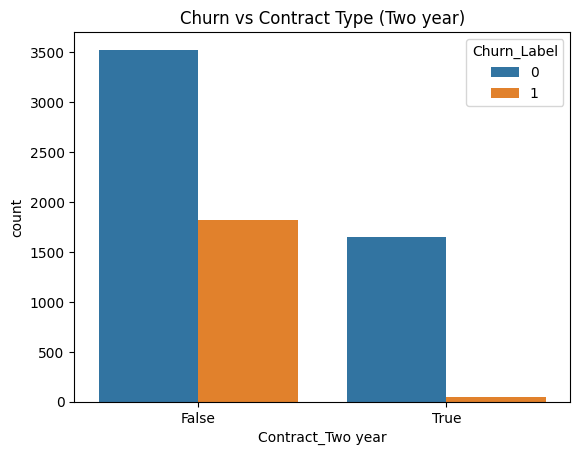

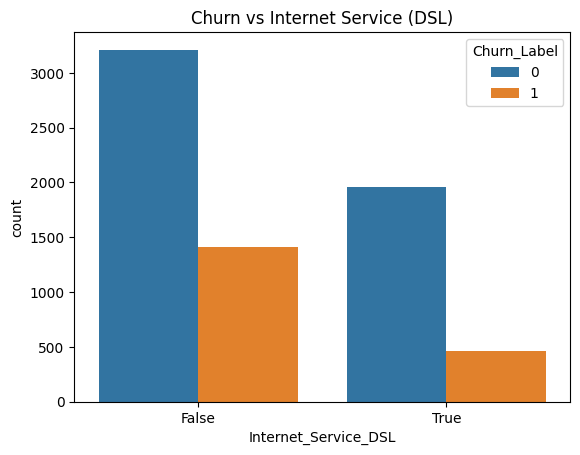

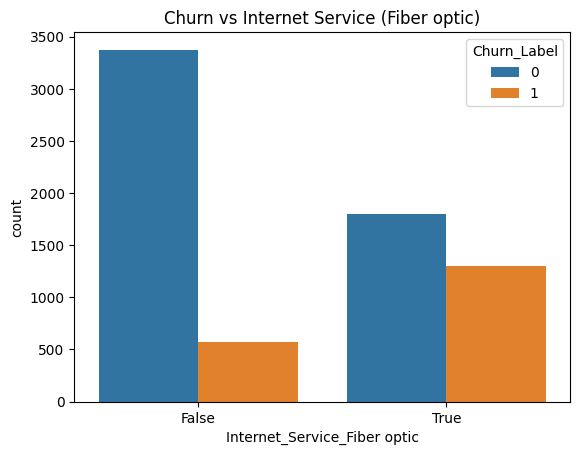

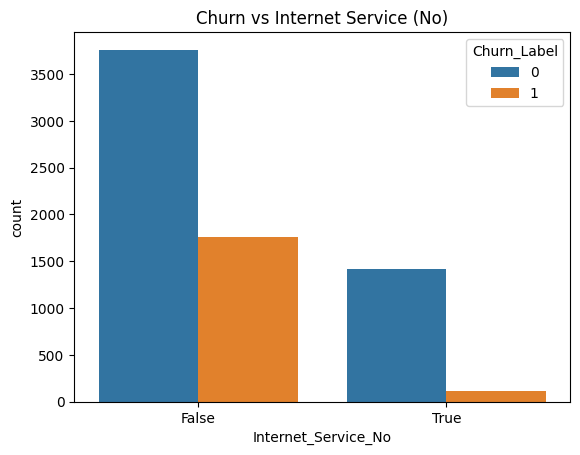

In [13]:
# Countplot for 'Churn_Label' with respect to 'Partner'
sns.countplot(x='Partner', hue='Churn_Label', data=df)
plt.title('Churn vs Partner')
plt.show()

# Countplot for 'Churn_Label' with respect to 'Contract' (one-hot encoded columns)
sns.countplot(x='Contract_Month-to-month', hue='Churn_Label', data=df)
plt.title('Churn vs Contract Type (Month-to-month)')
plt.show()

sns.countplot(x='Contract_One year', hue='Churn_Label', data=df)
plt.title('Churn vs Contract Type (One year)')
plt.show()

sns.countplot(x='Contract_Two year', hue='Churn_Label', data=df)
plt.title('Churn vs Contract Type (Two year)')
plt.show()

# Countplot for 'Churn_Label' with respect to 'Internet_Service' (one-hot encoded columns)
sns.countplot(x='Internet_Service_DSL', hue='Churn_Label', data=df)
plt.title('Churn vs Internet Service (DSL)')
plt.show()

sns.countplot(x='Internet_Service_Fiber optic', hue='Churn_Label', data=df)
plt.title('Churn vs Internet Service (Fiber optic)')
plt.show()

sns.countplot(x='Internet_Service_No', hue='Churn_Label', data=df)
plt.title('Churn vs Internet Service (No)')
plt.show()




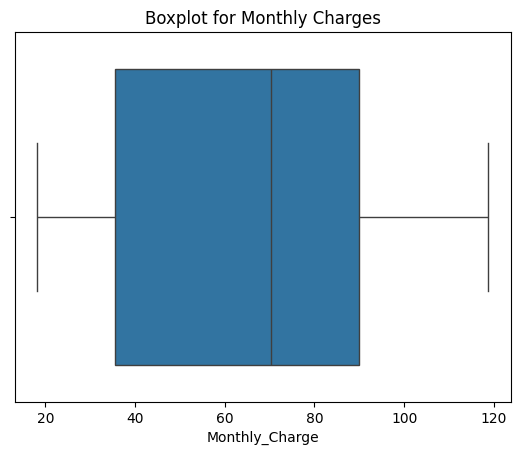

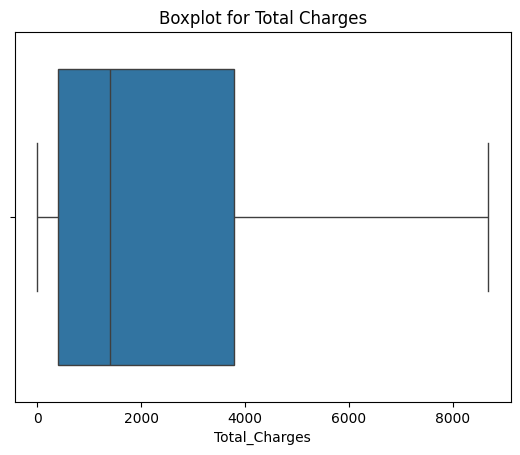

In [14]:
# Boxplot to detect outliers in 'Monthly_Charge'
sns.boxplot(x=df['Monthly_Charge'])
plt.title('Boxplot for Monthly Charges')
plt.show()

# Boxplot to detect outliers in 'Total_Charges'
sns.boxplot(x=df['Total_Charges'])
plt.title('Boxplot for Total Charges')
plt.show()


Churn_Reason
\r                                             5174
Attitude of support person\r                    192
Competitor offered higher download speeds\r     189
Competitor offered more data\r                  162
Don't know\r                                    154
Competitor made better offer\r                  140
Attitude of service provider\r                  135
Competitor had better devices\r                 130
Network reliability\r                           103
Product dissatisfaction\r                       102
Price too high\r                                 98
Service dissatisfaction\r                        89
Lack of self-service on Website\r                88
Extra data charges\r                             57
Moved\r                                          53
Limited range of services\r                      44
Lack of affordable download/upload speed\r       44
Long distance charges\r                          44
Poor expertise of phone support\r                20

) missing from font(s) DejaVu Sans.on\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


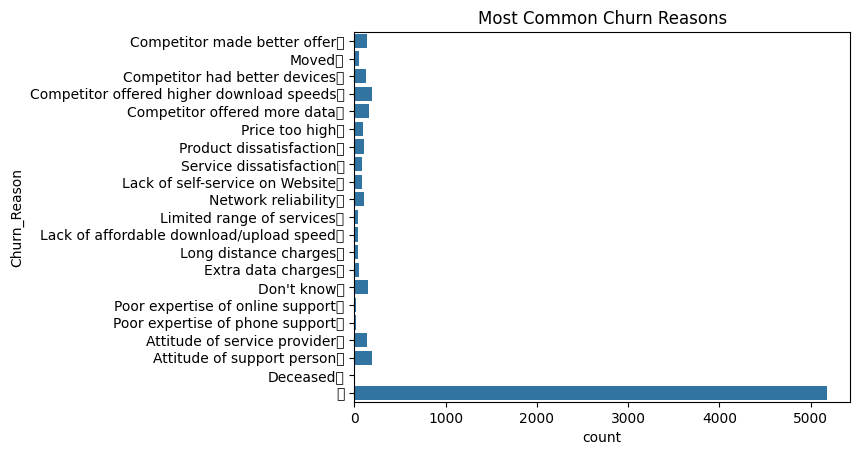

In [15]:
# Value counts for churn reasons
print(df['Churn_Reason'].value_counts())

# Visualize the most common churn reasons
sns.countplot(y='Churn_Reason', data=df)
plt.title('Most Common Churn Reasons')
plt.show()


### Model Building and Evaluation (Machine Learning with Python)

In [16]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df = df.drop(columns=['CustomerID', 'Churn_Reason'], errors='ignore')

# Ensure all features are numeric
X = df.drop(columns=['Churn_Label','Churn_Value'])  
y = df['Churn_Label']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')



Training set size: 5634
Test set size: 1409


In [17]:
# Check columns with object data type
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index([], dtype='object')


In [18]:
# Fill missing values in numerical columns with the mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Fill missing values in categorical columns with the mode
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)

# Verify that no missing values remain
print(X_train.isnull().sum().sum())  
print(X_test.isnull().sum().sum())   


0
0


#### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9027679205110007
Confusion Matrix:
[[939  70]
 [ 67 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1009
           1       0.83      0.83      0.83       400

    accuracy                           0.90      1409
   macro avg       0.88      0.88      0.88      1409
weighted avg       0.90      0.90      0.90      1409



C:\Users\mahmu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')


Random Forest Accuracy: 0.9198012775017743
Confusion Matrix:
[[977  32]
 [ 81 319]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1009
           1       0.91      0.80      0.85       400

    accuracy                           0.92      1409
   macro avg       0.92      0.88      0.90      1409
weighted avg       0.92      0.92      0.92      1409



In [21]:
# Save the model
import joblib
joblib.dump(rf_model, r'C:\Users\mahmu\Downloads\DataAnalyticsProjects\Customer Churn Prediction\random_forest_model.pkl')


['C:\\Users\\mahmu\\Downloads\\DataAnalyticsProjects\\Customer Churn Prediction\\random_forest_model.pkl']

In [22]:
df

,Count,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yosemite National Park,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,1,90003,33.964131,-118.272783,1,0,0,0,2,1,...,False,False,False,False,False,False,False,False,False,False
1,1,90005,34.059281,-118.307420,0,0,0,1,2,1,...,False,False,False,False,False,False,False,False,False,False
2,1,90006,34.048013,-118.293953,0,0,0,1,8,1,...,False,False,False,False,False,False,False,False,False,False
3,1,90010,34.062125,-118.315709,0,0,1,1,28,1,...,False,False,False,False,False,False,False,False,False,False
4,1,90015,34.039224,-118.266293,1,0,0,1,49,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,92285,34.341737,-116.539416,0,0,0,0,72,1,...,False,False,False,False,False,False,False,False,False,False
7039,1,92301,34.667815,-117.536183,1,0,1,1,24,1,...,False,False,False,False,False,False,False,False,False,False
7040,1,92304,34.559882,-115.637164,0,0,1,1,72,1,...,False,False,False,False,False,False,False,False,False,False
7041,1,92305,34.167800,-116.864330,0,0,1,1,11,0,...,False,False,False,False,False,False,False,False,False,False


In [25]:
import numpy as np

# Get feature importance (absolute coefficient values)
feature_importance = np.abs(rf_model.feature_importances_)

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

feature_df.head(10)


,Feature,Importance
20,Churn_Score,0.274117
19,Total_Charges,0.056198
8,Tenure_Months,0.053813
18,Monthly_Charge,0.041779
25,Contract_Month-to-month,0.041704
21,CLTV,0.034665
2,Latitude,0.033132
1,Zip_Code,0.032080
3,Longitude,0.031166
11,Online_Security,0.020798


In [29]:
# Define the selected columns for Power BI
selected_columns = [
    'Churn_Score', 'Total_Charges', 'Tenure_Months', 'Monthly_Charge', 'Contract_Month-to-month',
    'CLTV', 'Latitude', 'Zip_Code', 'Longitude', 'Online_Security', 'Churn_Label',
    'Senior_Citizen', 'Partner', 'Dependents', 'Paperless_Billing', 'Tech_Support',
    'Device_Protection'
]

# Include dynamically named columns like Payment_Method_* and Contract_*
selected_columns += [col for col in df.columns if col.startswith('Payment_Method_')]
selected_columns += [col for col in df.columns if col.startswith('Internet_Service_')]
selected_columns += [col for col in df.columns if col.startswith('Contract_')]

# Create the final dataset for Power BI
df_powerbi = df[selected_columns]

# Save as CSV for Power BI import
df_powerbi.to_csv(r'C:\Users\mahmu\Downloads\DataAnalyticsProjects\Customer Churn Prediction\customer_churn_powerbi.csv', index=False)

print("Dataset prepared and saved as 'customer_churn_powerbi.csv' for Power BI.")


Dataset prepared and saved as 'customer_churn_powerbi.csv' for Power BI.
